Q1: How many modules formed in this year?
Q2: How many stocks in each module?
Q3: In the first six modules, whether there are enrichment for certain sectors?
Q4: What the degree distributions in each year?
Q5: In each quarter of degrees, what the sector distribution is ?
Q6: What the average degree for each sector in each year and the change over year?
Q7: What the average clustering values in each year?
Q8: In the first quarter of clustering, whether certain sectors highly enriched?
Q9: same as Q7/8 for eigencentrality? important stocks, sectors?


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

For 2008 year

In [2]:
test = pd.read_csv('./Results/corr_2008_Nodes_stats.csv', index_col=0)

In [3]:
test.head()

,0,modularity_class,degree,clustering,eigencentrality
id,,,,,
AGN,Health Care,2,31,0.800000,0.110032
EOG,Energy,1,61,0.928415,0.168423
CPB,Consumer Staples,2,6,1.000000,0.018002
IDXX,Health Care,2,53,0.840348,0.219199
YUM,Consumer Discretionary,3,159,0.730197,0.635116


In [8]:
n_module = test.loc[:,'modularity_class'].max() +1

In [9]:
n_module

4

In [11]:
group_module = test.groupby(by='modularity_class')

In [14]:
group_module['modularity_class'].count()

modularity_class
0      4
1    115
2    138
3    177
Name: modularity_class, dtype: int64

In [21]:
group_module['degree'].mean()

modularity_class
0      4.000000
1    105.060870
2    101.623188
3    123.593220
Name: degree, dtype: float64

In [26]:
modu_sec = test.groupby(['modularity_class','0'])

In [27]:
modu_sec.mean()
    

degree  clustering  \
modularity_class 0                                                     
0                Industrials                    4.000000    0.791667   
1                Consumer Discretionary        43.200000    0.632561   
                 Consumer Staples              55.000000    0.885522   
                 Energy                        94.000000    0.791900   
                 Health Care                   27.666667    0.614557   
                 Industrials                  182.833333    0.602853   
                 Information Technology        81.142857    0.759575   
                 Materials                    145.357143    0.698224   
                 Real Estate                   89.000000    0.697596   
                 Utilities                     90.000000    0.746317   
2                Consumer Discretionary       173.272727    0.607079   
                 Consumer Staples              63.181818    0.770524   
                 Energy                       176.000000    0.543285   
                 Financials                   190.000000    0.583964   
                 Health Care                   52.512195    0.788250   
                 Industrials                  149.750000    0.706724   
                 Information Technology       130.000000    0.721434   
                 Materials                    236.000000    0.526480   
                 Real Estate                   15.000000    1.000000   
                 Telecommunications Services  111.000000    0.710870   
                 Utilities                    108.230769    0.714569   
3                Consumer Discretionary       114.425926    0.727179   
                 Consumer Staples              52.800000    0.717245   
                 Financials                   111.527273    0.720267   
                 Industrials                  142.500000    0.744932   
                 Information Technology       131.750000    0.620582   
                 Materials                    115.166667    0.780541   
                 Real Estate                  165.360000    0.694260   

                                              eigencentrality  
modularity_class 0                                             
0                Industrials                         0.002148  
1                Consumer Discretionary              0.170462  
                 Consumer Staples                    0.181607  
                 Energy                              0.293041  
                 Health Care                         0.118396  
                 Industrials                         0.624719  
                 Information Technology              0.312562  
                 Materials                           0.470055  
                 Real Estate                         0.335719  
                 Utilities                           0.267028  
2                Consumer Discretionary              0.578585  
                 Consumer Staples                    0.229964  
                 Energy                              0.537749  
                 Financials                          0.651173  
                 Health Care                         0.182153  
                 Industrials                         0.521532  
                 Information Technology              0.483437  
                 Materials                           0.790855  
                 Real Estate                         0.078547  
                 Telecommunications Services         0.413684  
                 Utilities                           0.350687  
3                Consumer Discretionary              0.425899  
                 Consumer Staples                    0.221339  
                 Financials                          0.398787  
                 Industrials                         0.545685  
                 Information Technology              0.501338  
                 Materials                           0.445214  
                 Real Estate     

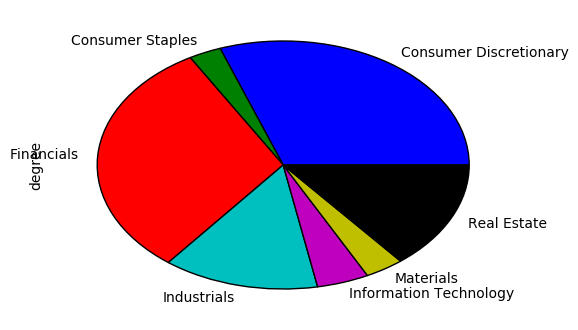

In [50]:
modu_sec.degree.count()[3].plot.pie()
plt.show()

In [53]:
%matplotlib inline

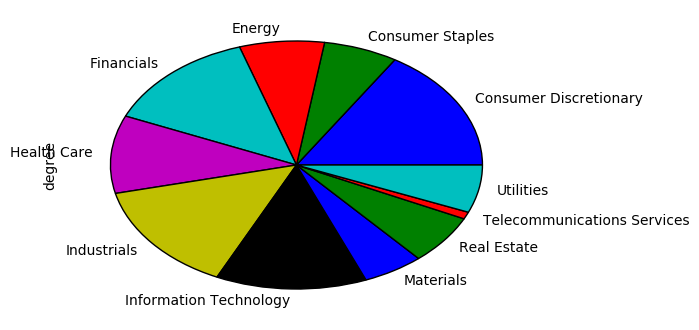

In [57]:
test.groupby('0').degree.count().plot.pie()

In [62]:
years = [str(year) for year in range(2008,2017)]
corr_stat_dict = {}
for year in years:

    corr_stat = pd.read_csv('Results/corr_' + year +'_Nodes_stats.csv', index_col=0)
    corr_stat_dict[year] = corr_stat

In [71]:
n_file = len(years)

In [85]:
corr_stat_dict['2008'].degree.mean()

110.59447004608295

In [97]:
mean_stat = {key:[corr_stat_dict[key].degree.mean(), corr_stat_dict[key].clustering.mean(), corr_stat_dict[key].eigencentrality.mean()] for key in years}

In [98]:
mean_stat

{'2008': [110.59447004608295, 0.724234775774491, 0.393863895957365],
 '2009': [67.47340425531915, 0.7015395933411087, 0.3409544509265923],
 '2010': [87.26288659793815, 0.734314166466307, 0.40122117757590076],
 '2011': [216.3920704845815, 0.8283861387385096, 0.6292217351815169],
 '2012': [12.20983606557377, 0.5057264385079047, 0.12979496584490313],
 '2013': [11.38047138047138, 0.555405460121582, 0.13385957664705844],
 '2014': [15.766871165644172, 0.6390643662891552, 0.15280358644378908],
 '2015': [33.722627737226276, 0.6845938372751694, 0.2111838683071139],
 '2016': [16.41038961038961, 0.5971761670632953, 0.14835066623932372]}

In [112]:
mean_stat_df = pd.DataFrame(mean_stat).transpose()
mean_stat_df.rename(columns={0:"Degree_mean",1:"Clustering_mean",2:"Eigencentrality_mean"},inplace=True)

In [113]:
mean_stat_df

,Degree_mean,Clustering_mean,Eigencentrality_mean
2008,110.594470,0.724235,0.393864
2009,67.473404,0.701540,0.340954
2010,87.262887,0.734314,0.401221
2011,216.392070,0.828386,0.629222
2012,12.209836,0.505726,0.129795
2013,11.380471,0.555405,0.133860
2014,15.766871,0.639064,0.152804
2015,33.722628,0.684594,0.211184
2016,16.410390,0.597176,0.148351


In [120]:
import matplotlib
matplotlib.style.use('ggplot')

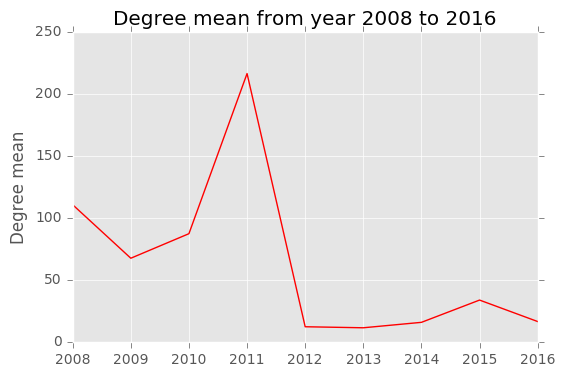

In [128]:

plt.plot(mean_stat_df.Degree_mean,'r')
plt.ticklabel_format(useOffset=False)
plt.title("Degree mean from year 2008 to 2016")
plt.ylabel("Degree mean")

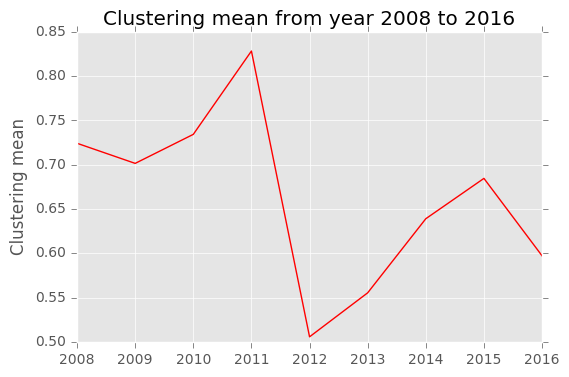

In [129]:

plt.plot(mean_stat_df.Clustering_mean,'r')
plt.ticklabel_format(useOffset=False)
plt.title("Clustering mean from year 2008 to 2016")
plt.ylabel("Clustering mean")

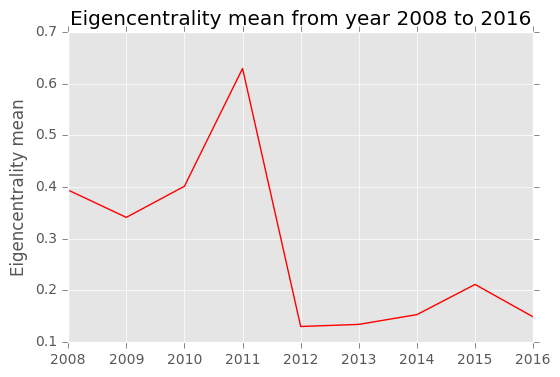

In [130]:

plt.plot(mean_stat_df.Eigencentrality_mean,'r')
plt.ticklabel_format(useOffset=False)
plt.title("Eigencentrality mean from year 2008 to 2016")
plt.ylabel("Eigencentrality mean")

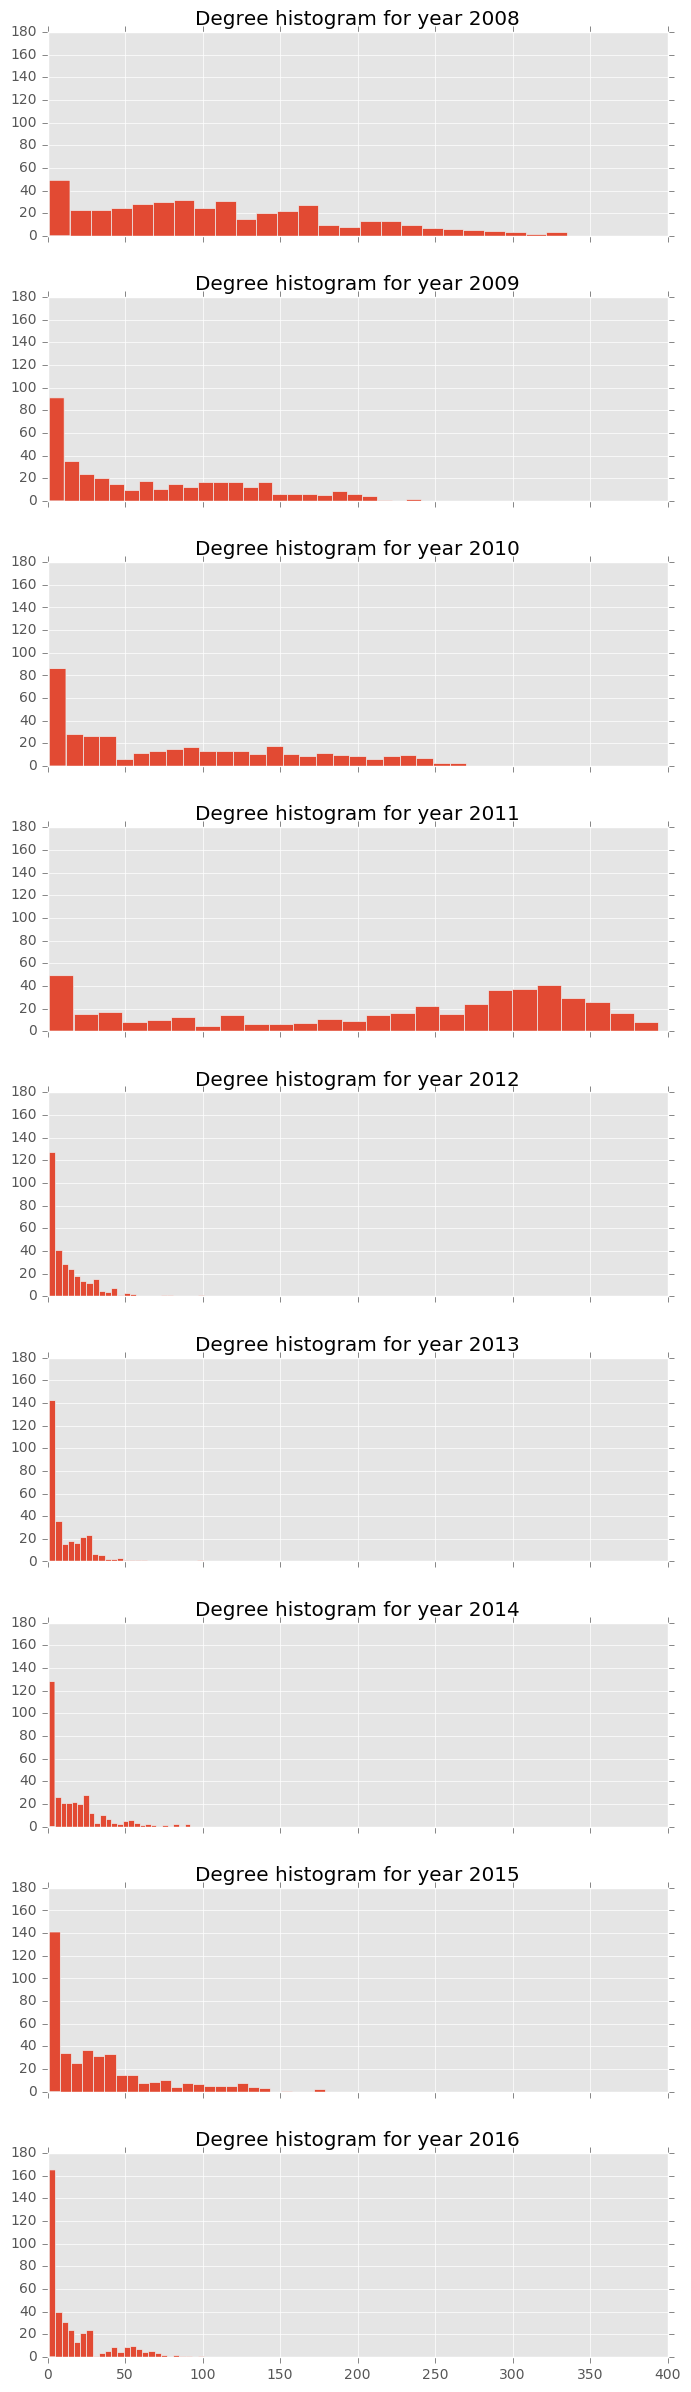

In [122]:
f, axarr = plt.subplots(n_file, sharex=True, sharey = True, figsize=(8,30))
for i in range(n_file):
    plot_year = str(i+2008)
    axarr[i].hist(corr_stat_dict[plot_year].degree, bins=25)
    axarr[i].set_xlim([0,400])
    axarr[i].set_ylim([0,180])
    axarr[i].set_title("Degree histogram for year "+plot_year)
f.subplots_adjust(hspace=0.3)
plt.savefig('degree hist from 2008-2016.png', format='png')

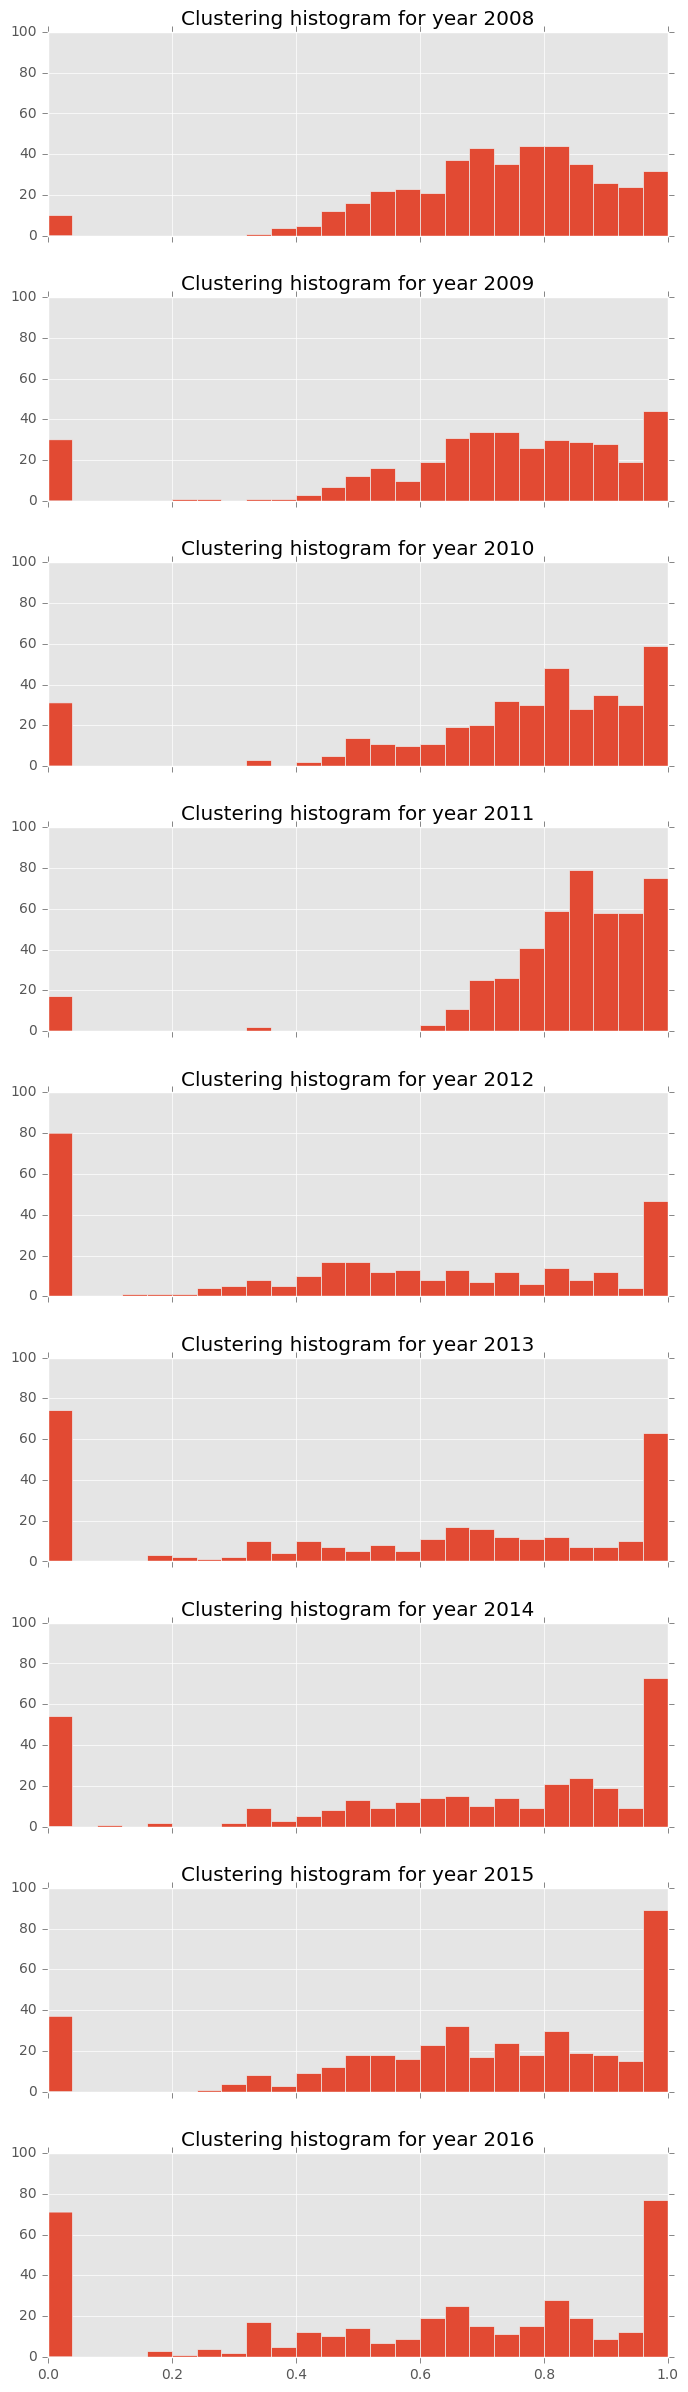

In [131]:
f, axarr = plt.subplots(n_file, sharex=True, sharey = True, figsize=(8,30))
for i in range(n_file):
    plot_year = str(i+2008)
    axarr[i].hist(corr_stat_dict[plot_year].clustering, bins=25)
    axarr[i].set_xlim([0,1])
    axarr[i].set_ylim([0,100])
    axarr[i].set_title("Clustering histogram for year "+plot_year)
f.subplots_adjust(hspace=0.3)
plt.savefig('clustering hist from 2008-2016.png', format='png')

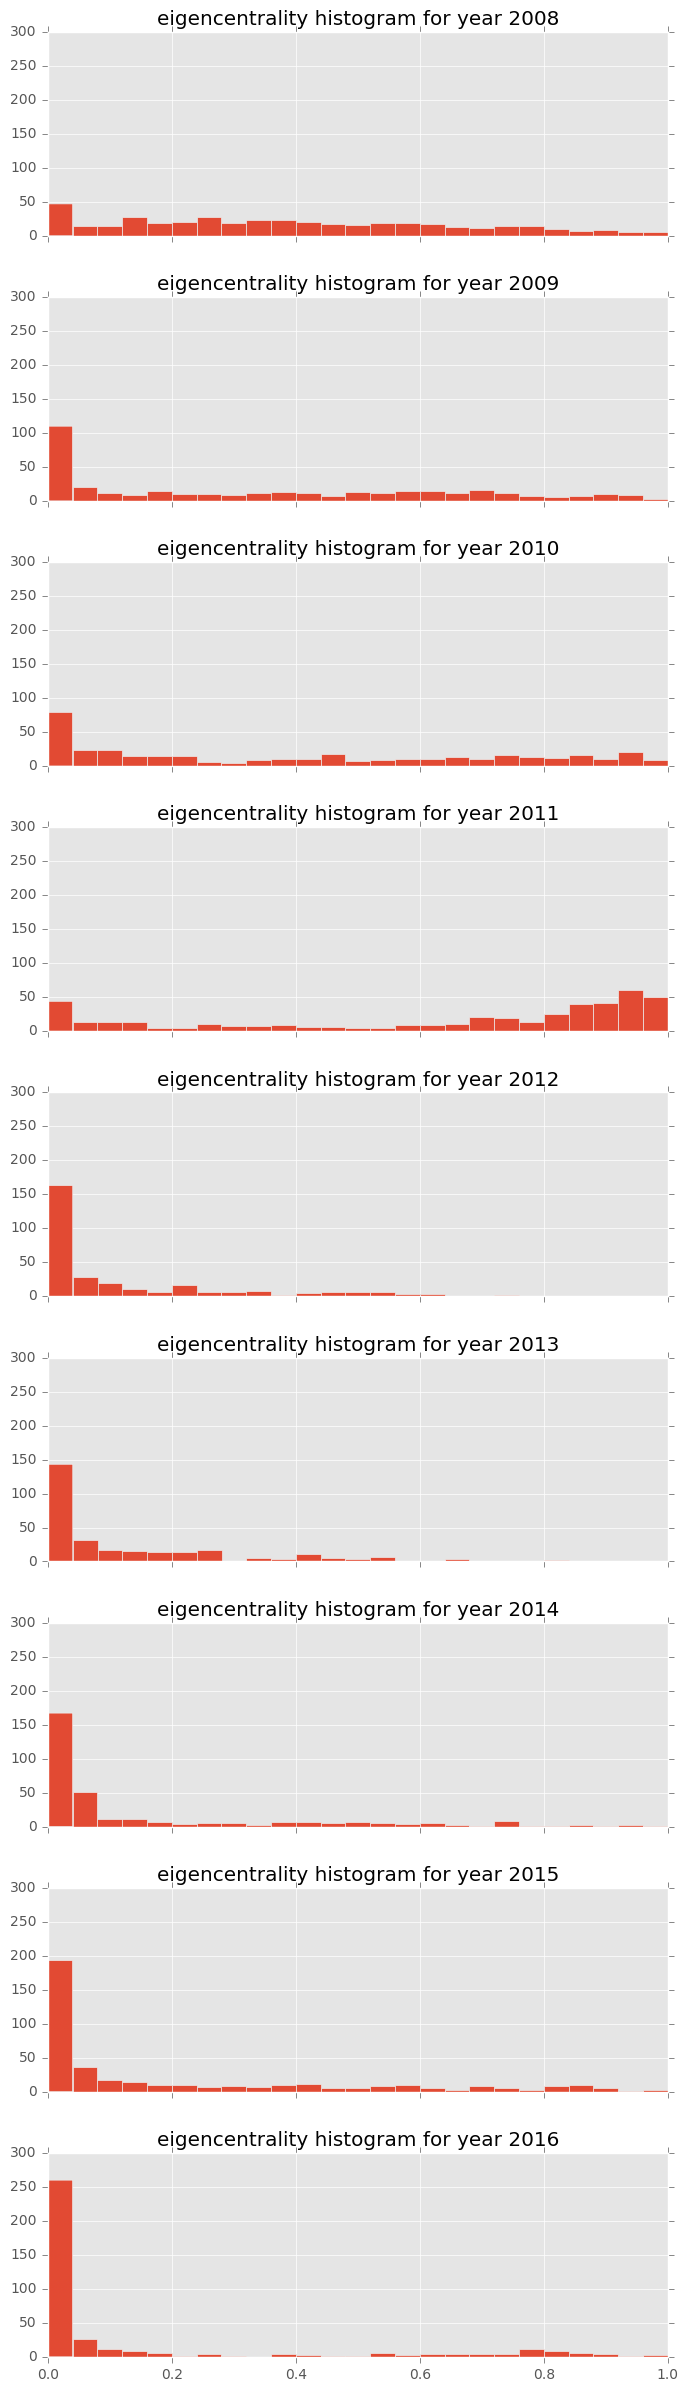

In [132]:
f, axarr = plt.subplots(n_file, sharex=True, sharey = True, figsize=(8,30))
for i in range(n_file):
    plot_year = str(i+2008)
    axarr[i].hist(corr_stat_dict[plot_year].eigencentrality, bins=25)
    axarr[i].set_xlim([0,1])
    axarr[i].set_ylim([0,300])
    axarr[i].set_title("eigencentrality histogram for year "+plot_year)
f.subplots_adjust(hspace=0.3)
plt.savefig('eigen hist from 2008-2016.png', format='png')